Problem: Does race, ethnicity, sexuality, or age have any predictive power of the success of awarded directors?

In [3]:
#Imports
import time
import pandas as pd
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager as CM
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup
import re
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import plotly

In [4]:
#Dataset that we have on demographic characteristics and award winning movie directors
df = pd.read_csv("Oscars-demographics-DFE.csv", encoding="ISO-8859-1")
df['Show'] = df['movie']


#Lists for data we will be collecting
ms_pr = [] #Meta score pro rating
ms_pn = [] #Meta score pro number
ms_jr = [] #Meta score joe rating
ms_jn = [] #Meta score pro number
ms_name = []

In [6]:
#For each movie, need to webscrape ratings from critics and normal viewers
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(options=options,  executable_path=CM().install())
url = 'https://www.metacritic.com/tv/the-colbert-report/critic-reviews?sort-by=date&num_items=100'
driver.get(url)
for x in range(0, len(df)):    
    #show = df['Show'][3]
    show = df['Show'][x]
    
    show = show.lower()
    url_txt = str(show).replace(" ", "-")
    
    urle = "https://www.metacritic.com/movie/" + url_txt
    
    try:
        driver.get(urle)
    except TimeoutException:
        
        time.sleep(3)
        driver.get(urle)    
    driver.get(urle)
    page_source = driver.page_source
    soup = BeautifulSoup(page_source,'lxml')
    vare = soup.find_all("td", {'class':"summary_right"})    
    try:
        ms_pr.append(int(re.findall('\d*\.?\d+',vare[0].text)[0]))
    except:
        ms_pr.append('None')        
    try:
        ms_jr.append(float(re.findall('\d*\.?\d+',vare[1].text)[0]))
    except:
        ms_jr.append('None')
    
    
    
    vare = soup.find_all("span", {'class':"based_on"})
    try:
        ms_pn.append(int(re.findall('\d*\.?\d+',vare[0].text)[0]))
    except:
        ms_pn.append('None')     
    try:
        ms_jn.append(float(re.findall('\d*\.?\d+',vare[1].text)[0]))
    except:
        ms_jn.append('None')
        
    vare = soup.find_all("h1")
    try:
        ms_name.append(vare[0].text)
    except:
        ms_name.append('Couldnt pull name')    


C:\Users\nicho\AppData\Local\Temp\ipykernel_50872\421402270.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(options=options,  executable_path=CM().install())


In [7]:


#IMDb to get Joe ratings

url = 'https://www.imdb.com/title/tt0350448/?ref_=nv_sr_srsg_0'
driver.get(url)


imbd_r = []
imbd_n = []
imbd_name = []
start_date = []

for show in df['Show']:
    
#show = df['Show'][1]

    time.sleep(2)
    driver.get(url)
    driver.find_element_by_xpath('//*[@id="suggestion-search"]').send_keys(show)
    time.sleep(5)
    #Click on first entry
    try:
        driver.find_element_by_xpath('//*[@id="react-autowhatever-1--item-0"]/a').click()
    except:
        imbd_r.append('Not in IMBd')
        imbd_n.append('Not in IMBd')
        imbd_name.append('Not in IMBd')
        start_date.append('Not in IMBd')
        continue
    page_source = driver.page_source
    soup = BeautifulSoup(page_source,'lxml')
    vare = soup.find_all("span", {'class':"AggregateRatingButton__RatingScore-sc-1ll29m0-1 iTLWoV"})
    try:
        imbd_r.append(float(vare[0].text))
    except:
        imbd_r.append('Not in IMDb')   
    vare = soup.find_all("div", {'class':"AggregateRatingButton__TotalRatingAmount-sc-1ll29m0-3 jkCVKJ"})
    try:
        imbd_n.append(vare[0].text)
    except:
        imbd_n.append('Not in IMDb')  
    vare = soup.find_all("span", {'class':"TitleBlockMetaData__ListItemText-sc-12ein40-2 jedhex"})    
    if len(vare) > 0:
        start_date.append(vare[0].text)
    else:
        start_date.append('Not Found')
    vare = soup.find_all("h1")    
    imbd_name.append(vare[0].text)
















C:\Users\nicho\AppData\Local\Temp\ipykernel_50872\2434840459.py:18: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath('//*[@id="suggestion-search"]').send_keys(show)
C:\Users\nicho\AppData\Local\Temp\ipykernel_50872\2434840459.py:22: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath('//*[@id="react-autowhatever-1--item-0"]/a').click()


In [8]:
df['Public Average Rating (IMDb)'] = imbd_r
df['Number Public Votes (IMDb)'] = imbd_n
df['IMBd title (check for validity)'] = imbd_name
df['First Air Date'] = start_date
df['Metascore Pro Rating'] = ms_pr
df['Number of Professional Reviewers'] = ms_pn
df['Metascore Name (check for validity)'] = ms_name

In [12]:
df.head(3)
df.to_csv('Movie_project_saved.csv')

In [59]:
df = pd.read_csv('results_21.csv')
df.columns

df.head(2)

,Unnamed: 0,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,...,sexual_orientation_gold,year_of_award_gold,Show,Public Average Rating (IMDb),Number Public Votes (IMDb),IMBd title (check for validity),First Air Date,Metascore Pro Rating,Number of Professional Reviewers,Metascore Name (check for validity)
0,0,670454353,False,finalized,3,2/10/2015 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,...,NaN,NaN,Two Arabian Knights,6.7,996,Two Arabian Knights,1927,NaN,NaN,Couldnt pull name
1,1,670454354,False,finalized,3,2/10/2015 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,...,NaN,NaN,The Divine Lady,6.2,757,The Divine Lady,1928,NaN,NaN,Couldnt pull name


In [60]:

### Cleaning the data
df = df.reset_index(drop=True)

for x in range(0,len(df)):
    try:
        int(df['Metascore Pro Rating'][x])
        float(df['Public Average Rating (IMDb)'][x])
        if df['Metascore Name (check for validity)'][x] == df['IMBd title (check for validity)'][x]:
            pass
        else:
            df = df.drop([x])                
    except:
        df = df.drop([x])
        pass


In [61]:

#Getting the numbers ready to regress
df['Public Average Rating (IMDb)'] = pd.to_numeric(df['Public Average Rating (IMDb)'], downcast="float")
df['Public Average Rating (IMDb)'] = df['Public Average Rating (IMDb)']*10

df = df.reset_index(drop = True)

for x in range(0,len(df)):
    try:
        if 'K' in df['Number Public Votes (IMDb)'][x]:
            df.at[x, 'Number Public Votes (IMDb)'] = df['Number Public Votes (IMDb)'][x].replace('K','')
            df.at[x, 'Number Public Votes (IMDb)'] = pd.to_numeric(df['Number Public Votes (IMDb)'][x])
            df.at[x,'Number Public Votes (IMDb)'] = df['Number Public Votes (IMDb)'][x]*1000
        elif 'M' in df['Number Public Votes (IMDb)'][x]:
            df.at[x, 'Number Public Votes (IMDb)'] = df['Number Public Votes (IMDb)'][x].replace('M','')
            df.at[x, 'Number Public Votes (IMDb)'] = pd.to_numeric(df['Number Public Votes (IMDb)'][x])
            df.at[x,'Number Public Votes (IMDb)'] = df['Number Public Votes (IMDb)'][x]*1000000
    except:
        pass


In [62]:
#Create dummy variables
for x in range(0,len(df)):
    df.at[x, 'race_ethnicity'] = df['race_ethnicity'][x].replace(' ','')
    df.at[x,'religion'] = df['religion'][x].replace(' ','')
    df.at[x, 'sexual_orientation'] = df['sexual_orientation'][x].replace(' ','')

df = pd.get_dummies(df, columns=['race_ethnicity'])
df = pd.get_dummies(df, columns=['religion'])
df = pd.get_dummies(df, columns=['sexual_orientation'])

df['religion_Anglican'] = df['religion_Anglican/episcopalian']
df['religion_Born_AgainChristian'] = df['religion_Born-AgainChristian']


df['number_public_votes'] = pd.to_numeric(df['Number Public Votes (IMDb)'])

df['pro_rating'] = pd.to_numeric(df['Metascore Pro Rating'])
df['number_professional_votes'] = pd.to_numeric(df['Number of Professional Reviewers'])
df['public_rating'] = pd.to_numeric(df['Public Average Rating (IMDb)'])


#Public minus critic variable
df['Metascore Pro Rating'] = pd.to_numeric(df['Metascore Pro Rating'])
df['public_minus_critic'] = df['Public Average Rating (IMDb)'] - df['Metascore Pro Rating']

#Year variable made from year of award
df['year'] = 0
for x in range(0,len(df)):
    df.at[x, 'year'] = df['year_of_award'][x] - df['year_of_award'].min()

#Add constant
df['const'] = 1

In [63]:
#Do identity characteristics coorelate with a difference between normal individuals ratings and professional ratings?
mod = smf.ols('public_minus_critic ~ const + year + race_ethnicity_Asian + race_ethnicity_Black + race_ethnicity_Hispanic + race_ethnicity_MiddleEastern + race_ethnicity_Multiracial + religion_Agnostic + religion_Anglican + religion_Atheist + religion_Baptist + religion_Born_AgainChristian + religion_Buddhist + religion_ChristianScience + religion_Congregationalist + religion_Deist + religion_DisciplesofChrist + religion_Hindu + religion_Jewish + religion_Lutheran + religion_Na + religion_Presbyterian + religion_Protestant + religion_Quaker + religion_RomanCatholic + religion_SeeNote + sexual_orientation_Bisexual + sexual_orientation_Gay + sexual_orientation_Lesbian + sexual_orientation_MatterofDispute + sexual_orientation_Na', data=df)
res = mod.fit()
print(res.summary())


                             OLS Regression Results                            
Dep. Variable:     public_minus_critic   R-squared:                       0.089
Model:                             OLS   Adj. R-squared:                 -0.030
Method:                  Least Squares   F-statistic:                    0.7485
Date:                 Tue, 25 Jul 2023   Prob (F-statistic):              0.827
Time:                         19:26:04   Log-Likelihood:                -965.88
No. Observations:                  260   AIC:                             1994.
Df Residuals:                      229   BIC:                             2104.
Df Model:                           30                                         
Covariance Type:             nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

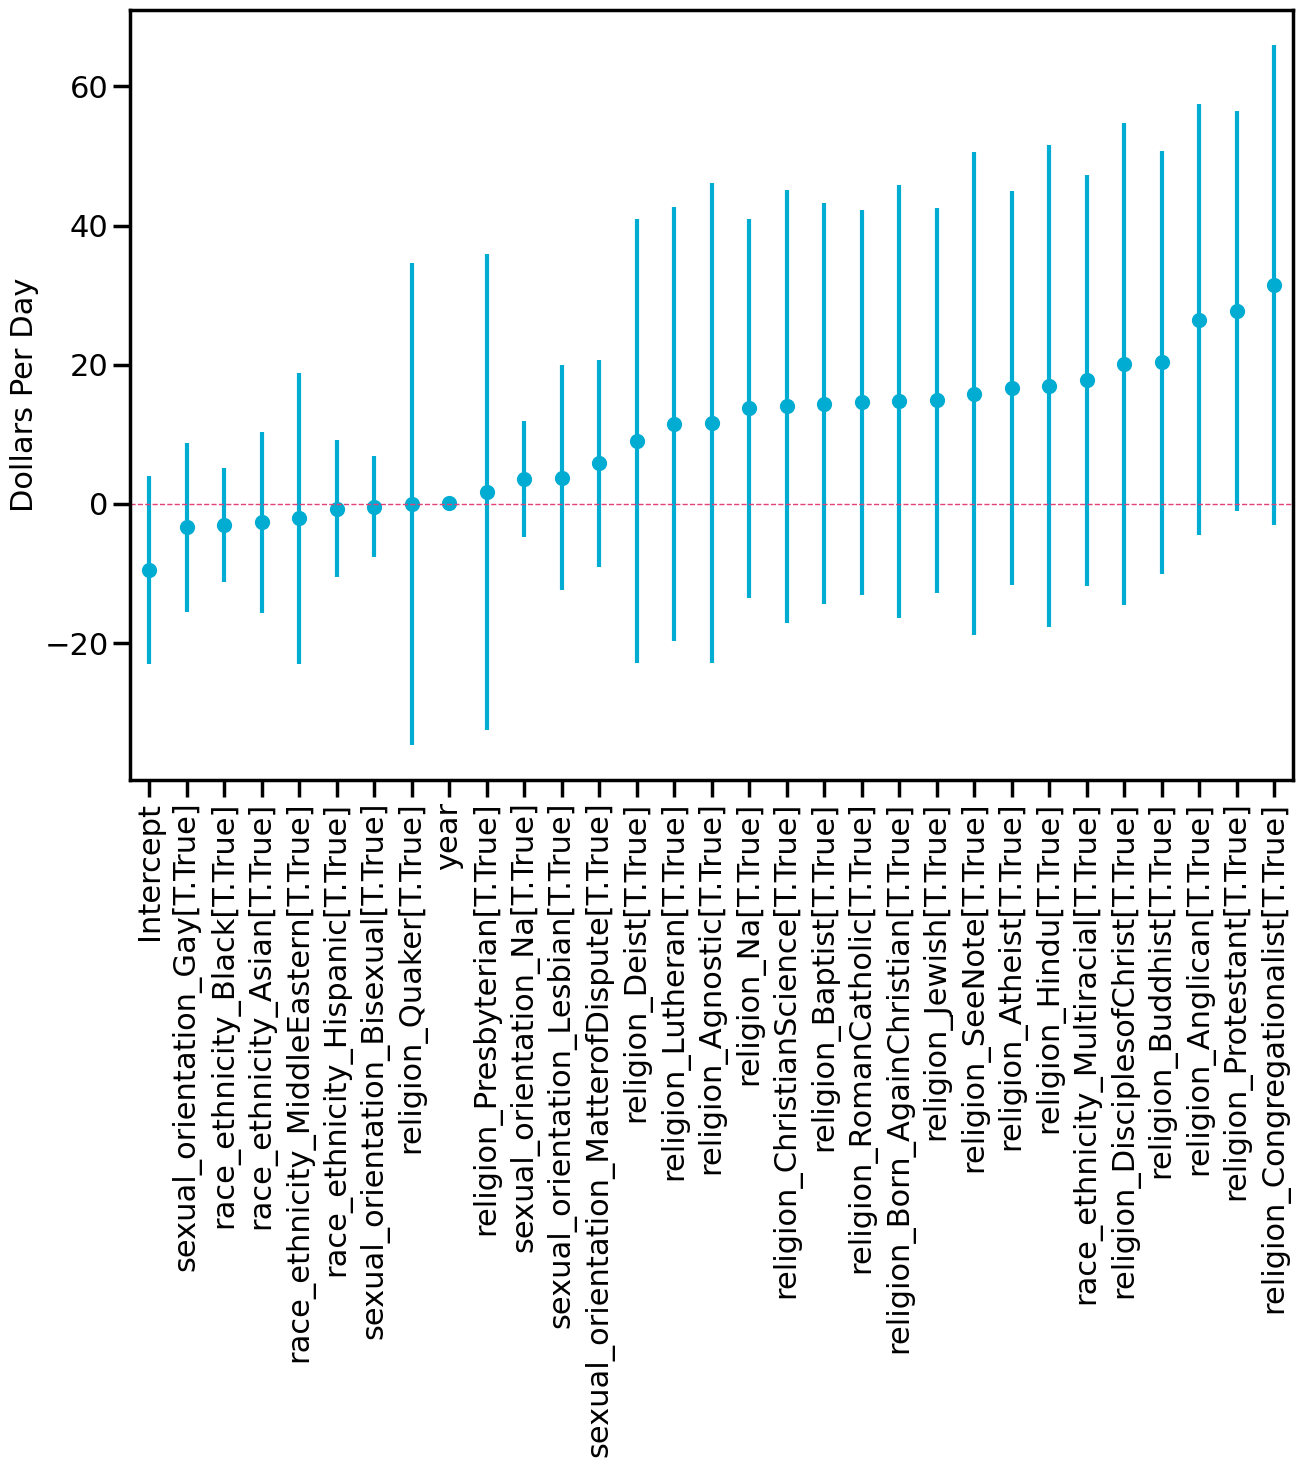

In [77]:
coef_df = pd.DataFrame(res.summary().tables[1].data)
coef_df
colors = ["#00acd2", "#e14377"]
# Add column names
coef_df.columns = coef_df.iloc[0]

# Drop the extra row with column labels
coef_df=coef_df.drop(0)

# Set index to variable names 
coef_df = coef_df.set_index(coef_df.columns[0])

# Change datatype from object to float
coef_df = coef_df.astype(float)

# Get errors; (coef - lower bound of conf interval)
errors = coef_df['coef'] - coef_df['[0.025']
for x in range(len(errors)):
    if errors[x] < 0:
        errors[x] = 0
# Append errors column to dataframe
coef_df['errors'] = errors

# Drop the constant for plotting
coef_df = coef_df.drop(['const'])

# Sort values by coef ascending
coef_df = coef_df.sort_values(by=['coef'])

### Plot Coefficients ###

# x-labels
variables = list(coef_df.index.values)

# Add variables column to dataframe
coef_df['variables'] = variables

# Set sns plot style back to 'poster'
# This will make bars wide on plot
sns.set_context("poster")

# Define figure, axes, and plot
fig, ax = plt.subplots(figsize=(15, 10))
len(errors)
# Error bars for 95% confidence interval
# Can increase capsize to add whiskers
coef_df.plot(x='variables', y='coef', kind='bar',
        ax=ax, color='none', fontsize=22, 
        ecolor=colors[0],capsize=0,
        yerr='errors', legend=False)

# Set title & labels
#plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=30)
ax.set_ylabel('Dollars Per Day',fontsize=22)
ax.set_xlabel('',fontsize=22)
# Line to define zero on the y-axis
ax.axhline(y=0, linestyle='--', color=colors[1], linewidth=1)
# Coefficients
ax.scatter(x=np.arange(coef_df.shape[0]), 
    marker='o', s=80, 
    y=coef_df['coef'], color=colors[0])

plt.show()


Index(['Unnamed: 0', '_unit_id', '_golden', '_unit_state',
       '_trusted_judgments', '_last_judgment_at', 'birthplace',
       'birthplace:confidence', 'date_of_birth', 'date_of_birth:confidence',
       'race_ethnicity:confidence', 'religion:confidence',
       'sexual_orientation:confidence', 'year_of_award',
       'year_of_award:confidence', 'award', 'biourl', 'birthplace_gold',
       'date_of_birth_gold', 'movie', 'person', 'race_ethnicity_gold',
       'religion_gold', 'sexual_orientation_gold', 'year_of_award_gold',
       'Show', 'Public Average Rating (IMDb)', 'Number Public Votes (IMDb)',
       'IMBd title (check for validity)', 'First Air Date',
       'Metascore Pro Rating', 'Number of Professional Reviewers',
       'Metascore Name (check for validity)'],
      dtype='object')

In [84]:
#Summarizing found results


#Chart with each row being a significant group and each column being what the outcome of interest is
atts = [
'Year' ,
'Asian' ,
'Black' ,
'Hispanic ',
'Middle Eastern' ,
'Multiracial' ,
'Agnostic' ,
'Anglican' ,
'Atheist' ,
'Baptist' ,
'Born Again Christian ',
'Buddhist' ,
'Christian Science' ,
'Congregationalist' ,
'Deist' ,
'Disciples of Christ' ,
'Hindu' ,
'Jewish' ,
'Lutheran' ,
'Religion NA' ,
'Presbyterian' ,
'Protestant' ,
'Quaker' ,
'Roman Catholic' ,
'Bisexual' ,
'Gay' ,
'Lesbian' ,
'Sexual Orientation Disputed' ,
'Sexual Orientation NA']

Pmc = ['O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O']
numcritic = ['X','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','X','O']
numpro = ['X','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O']
pubrat = ['O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O']
prorat = ['O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O']


tabel = pd.DataFrame(atts)
tabel['Attribute'] = tabel[0]
tabel = tabel[['Attribute']]
tabel['Public Minus Critic Reviews'] = Pmc
tabel['Number Public Reviews'] = numcritic
tabel['Number Professional Reviews'] = numpro
tabel['Public Rating'] = pubrat
tabel['Professional Rating'] = prorat
print('Statistical Significance of Measured Variables')
tabel

Statistical Significance of Measured Variables


,Attribute,Public Minus Critic Reviews,Number Public Reviews,Number Professional Reviews,Public Rating,Professional Rating
0,Year,O,X,X,O,O
1,Asian,O,O,O,O,O
2,Black,O,O,O,O,O
3,Hispanic,O,O,O,O,O
4,Middle Eastern,O,O,O,O,O
5,Multiracial,O,O,O,O,O
6,Agnostic,O,O,O,O,O
7,Anglican,O,O,O,O,O
8,Atheist,O,O,O,O,O
9,Baptist,O,O,O,O,O
